In [1]:
## Working thorugh http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb

import scipy.stats as stats

dist = stats.beta

In [2]:
%matplotlib inline

In [3]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

In [7]:
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
## rvs - random variates of the dist
dataUnbiased = stats.bernoulli.rvs(0.5, size=n_trials[-1])
dataBiased = stats.bernoulli.rvs(0.1, size=n_trials[-1])

In [14]:
dataBiased.sum(), dataUnbiased.sum()

(63, 258)

In [16]:
figsize(11, 9)
x = np.linspace(0,1, 100) # get a numpy array of 100 evenly spaced points between0 and 1

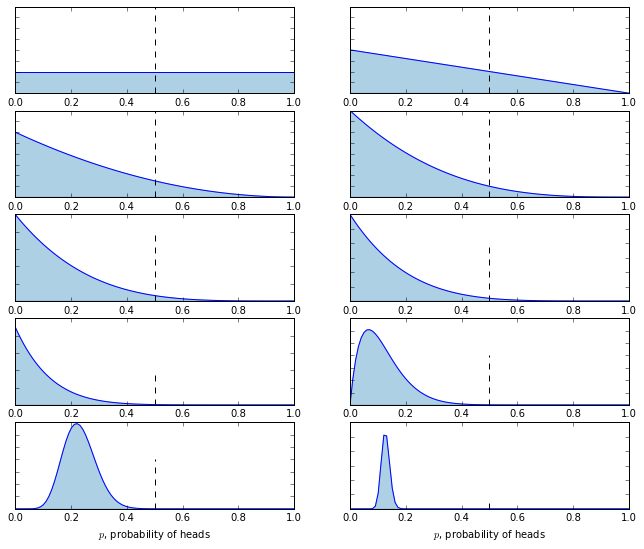

In [24]:
for k,N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads")
    plt.setp(sx.get_yticklabels(), visible = False)
    #Fit a beta distribution to the data and plot
    heads = dataBiased[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)  #conjugate beta dist
    plt.plot(x, y)
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)

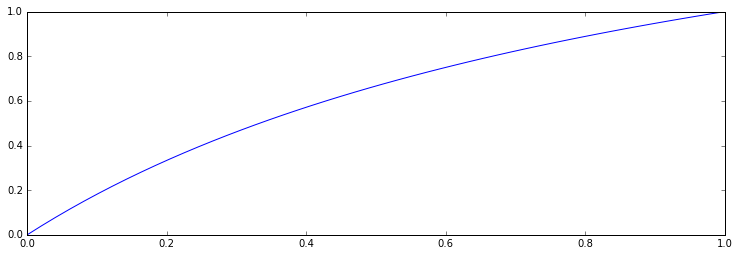

In [25]:
figsize(12.5,4)
p = np.linspace(0,1,50)
plt.plot(p, (2 * p) / (1 + p))

In [26]:
##Lower the prioer is, the bigger the information gain

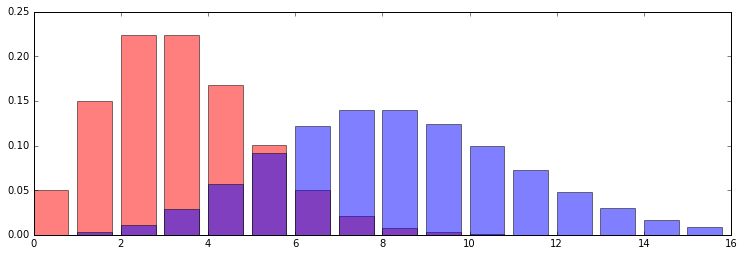

In [35]:
##Exploring the poisson distrbution
x = np.arange(16)
poi = stats.poisson
lambdas = [3, 8]
colours = [ "red", "blue", "green", "yellow"]
alpha = 0.5

for i in range(len(lambdas)):
    plt.bar(x, poi.pmf(x, lambdas[i]), alpha = alpha, color = colours[i])

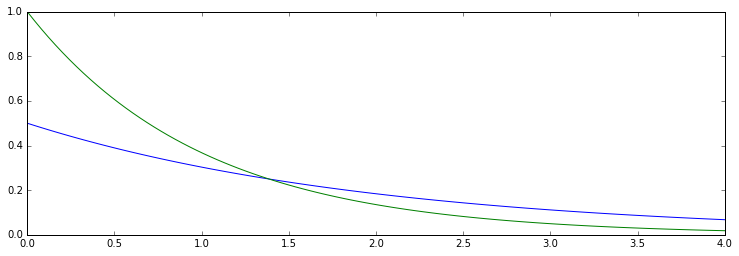

In [38]:
expo = stats.expon 
a = np.linspace(0,4,100)
plt.plot(a, expo.pdf(a, scale = 1./ 0.5))
plt.plot(a, expo.pdf(a, scale = 1./ 1.))